In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import yake
import spacy

In [ ]:
# Filter the dataset to only include English language and displaya the first 5 rows

filtered_df = pd.read_csv(r"Data\aa_dataset-tickets-multi-lang-5-2-50-version.csv")

filtered_df = filtered_df[filtered_df["language"] == "en"]
filtered_df.to_csv("Updated_data.csv", index=False)
print(filtered_df.head(5))

                                             subject  \
1                                 Account Disruption   
2  Query About Smart Home System Integration Feat...   
3                  Inquiry Regarding Invoice Details   
4  Question About Marketing Agency Software Compa...   
5                                      Feature Query   

                                                body  \
1  Dear Customer Support Team,\n\nI am writing to...   
2  Dear Customer Support Team,\n\nI hope this mes...   
3  Dear Customer Support Team,\n\nI hope this mes...   
4  Dear Support Team,\n\nI hope this message reac...   
5  Dear Customer Support,\n\nI hope this message ...   

                                              answer      type  \
1  Thank you for reaching out, <name>. We are awa...  Incident   
2  Thank you for your inquiry. Our products suppo...   Request   
3  We appreciate you reaching out with your billi...   Request   
4  Thank you for your inquiry. Our product suppor...   Problem

In [25]:
# Removes NaN and  missing values in the subject and body columns

subject_text = " ".join(filtered_df['subject'].dropna())
body_text = " ".join(filtered_df['body'].dropna())

In [ ]:
# First 5 Subject length 
filtered_df['subject'] = filtered_df['subject'].fillna("")
filtered_df['subject_length'] = filtered_df['subject'].apply(len)

print(filtered_df[['subject', 'subject_length']].head(5).to_string(index=False))


                                               subject  subject_length
                                    Account Disruption              18
    Query About Smart Home System Integration Features              50
                     Inquiry Regarding Invoice Details              33
Question About Marketing Agency Software Compatibility              54
                                         Feature Query              13


C:\Users\Tharani\AppData\Local\Temp\ipykernel_24848\3987142705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['subject'] = filtered_df['subject'].fillna("")
C:\Users\Tharani\AppData\Local\Temp\ipykernel_24848\3987142705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['subject_length'] = filtered_df['subject'].apply(len)


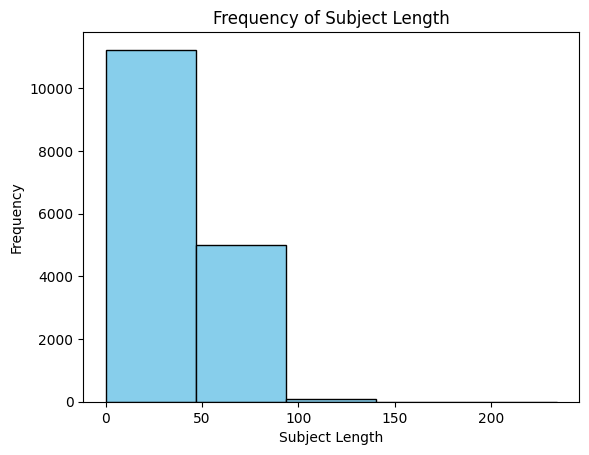

In [38]:
# Subject length with Frequency 
plt.hist(filtered_df['subject_length'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("Subject Length")
plt.ylabel("Frequency")
plt.title("Frequency of Subject Length")
plt.show()

In [ ]:
# First 5 Body length 

filtered_df['Body_length'] = filtered_df['body'].apply(len)

print(filtered_df[['body', 'Body_length']].head(5).to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body  Body_length
                                                                                                                                     Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage i

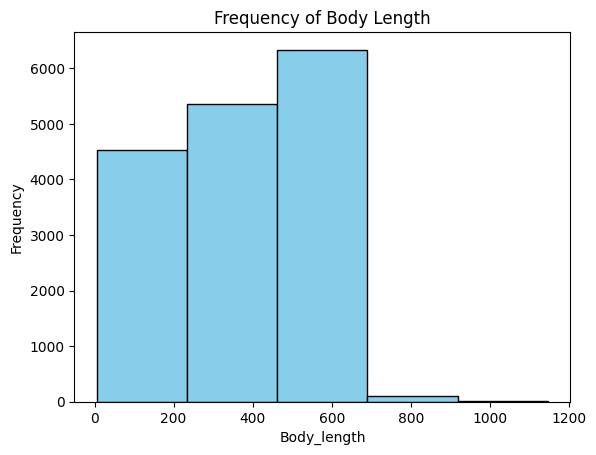

In [37]:
# Body length with frequency
plt.hist(filtered_df['Body_length'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("Body_length")
plt.ylabel("Frequency")
plt.title("Frequency of Body Length")
plt.show()

In [ ]:
# Calculates word frequency in Subject

filtered_df['word_frequency'] = filtered_df['subject'].apply(lambda x: Counter(x.split()))
print(filtered_df[['subject', 'word_frequency']].head(5).to_string(index=False))


                                               subject                                                                                word_frequency
                                    Account Disruption                                                               {'Account': 1, 'Disruption': 1}
    Query About Smart Home System Integration Features {'Query': 1, 'About': 1, 'Smart': 1, 'Home': 1, 'System': 1, 'Integration': 1, 'Features': 1}
                     Inquiry Regarding Invoice Details                                    {'Inquiry': 1, 'Regarding': 1, 'Invoice': 1, 'Details': 1}
Question About Marketing Agency Software Compatibility   {'Question': 1, 'About': 1, 'Marketing': 1, 'Agency': 1, 'Software': 1, 'Compatibility': 1}
                                         Feature Query                                                                    {'Feature': 1, 'Query': 1}


In [ ]:
# Calculates word frequency in Body
filtered_df['word_frequency'] = filtered_df['body'].apply(lambda x: Counter(x.split()))
print(filtered_df[['body', 'word_frequency']].head(5).to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body                                                                                                                                                                                                                                                                                                                                   

In [55]:
# Top 5 subject values and sentiment scores

filtered_df['sentiment_sub'] = filtered_df['subject'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(filtered_df[['subject', 'sentiment_sub']].head(5).to_string(index=False))


                                               subject  sentiment_sub
                                    Account Disruption       0.000000
    Query About Smart Home System Integration Features       0.214286
                     Inquiry Regarding Invoice Details       0.000000
Question About Marketing Agency Software Compatibility       0.000000
                                         Feature Query       0.000000


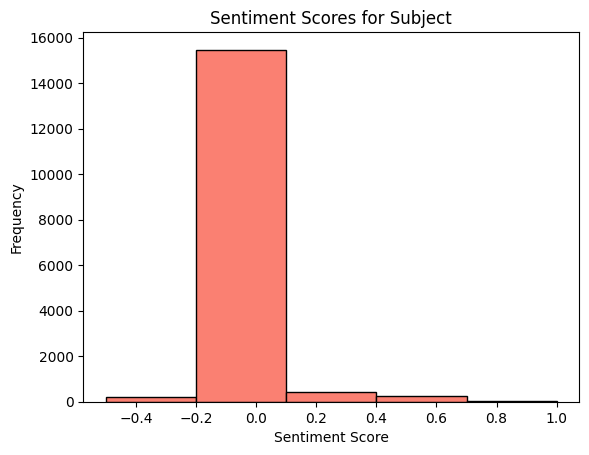

In [56]:
# Sentiment score with frequency for subject
plt.hist(filtered_df['sentiment_sub'], bins=5, color='salmon', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Scores for Subject")
plt.show()

In [57]:
# Top 5 body values and sentiment scores
filtered_df['sentiment_body'] = filtered_df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(filtered_df[['body', 'sentiment_body']].head(5).to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body  sentiment_body
                                                                                                                                     Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outag

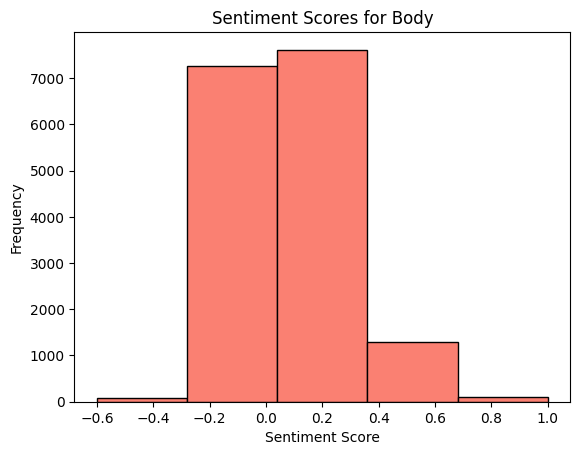

In [59]:
# Sentiment score with frequency for body 
plt.hist(filtered_df['sentiment_body'], bins=5, color='salmon', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Scores for Body")
plt.show()

In [ ]:
# word count for subject 
subject_words = Counter(subject_text.split()).most_common(20)
print("Most common words in subject:")
for word in subject_words:
    print(word)


Most common words in subject:
('for', 3606)
('Data', 3506)
('with', 3112)
('in', 1754)
('Support', 1658)
('Digital', 1500)
('Security', 1489)
('on', 1390)
('Analytics', 1390)
('Medical', 1343)
('Problem', 1314)
('Integration', 1272)
('Marketing', 1066)
('Request', 1038)
('Investment', 1028)
('Assistance', 1023)
('System', 951)
('SaaS', 918)
('Project', 902)
('of', 858)


In [29]:
# word count for Body
body_words = Counter(body_text.split()).most_common(20)
print("Most common words in body:")
for word in body_words:
    print(word)


Most common words in body:
('the', 36581)
('to', 36516)
('and', 29960)
('I', 11252)
('you', 10536)
('in', 10278)
('a', 9209)
('data', 8866)
('on', 8638)
('for', 8434)
('would', 7759)
('have', 7166)
('is', 7078)
('be', 7019)
('your', 6902)
('of', 6612)
('this', 6429)
('our', 6417)
('We', 6263)
('with', 6226)


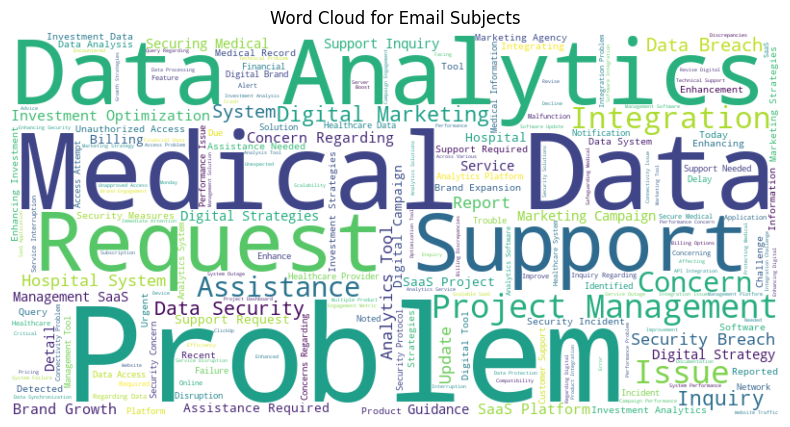

In [ ]:
# word cloud for subject
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(subject_text )

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Email Subjects")
plt.show()


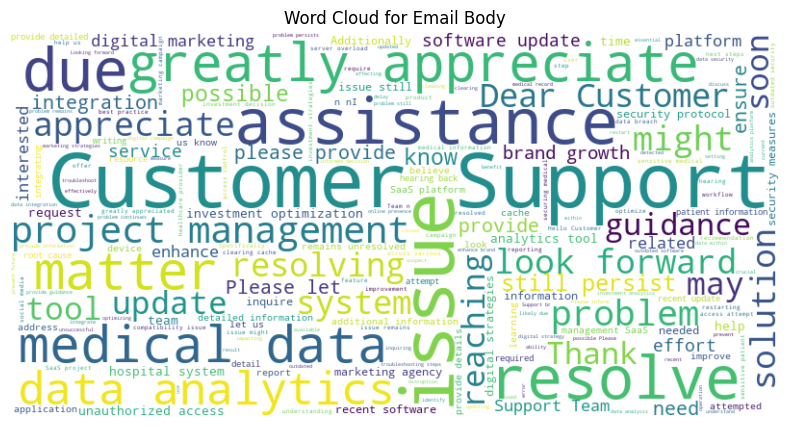

In [30]:
# word cloud for Body
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(body_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Email Body")
plt.show()

In [ ]:

print("\nUnique Subjects Count:", filtered_df['subject'].nunique())
print("Total Subjects Count:", len(filtered_df))



Unique Subjects Count: 13732
Total Subjects Count: 16338


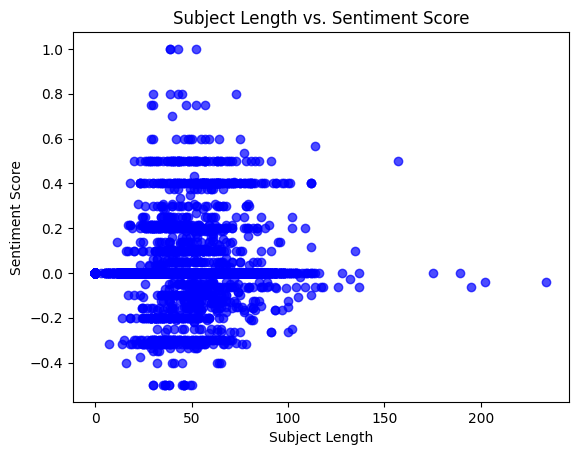

In [60]:
# Plot Subject Length vs. Sentiment Score
plt.scatter(filtered_df['subject_length'], filtered_df['sentiment'], color='blue', alpha=0.7)
plt.xlabel("Subject Length")
plt.ylabel("Sentiment Score")
plt.title("Subject Length vs. Sentiment Score")
plt.show()




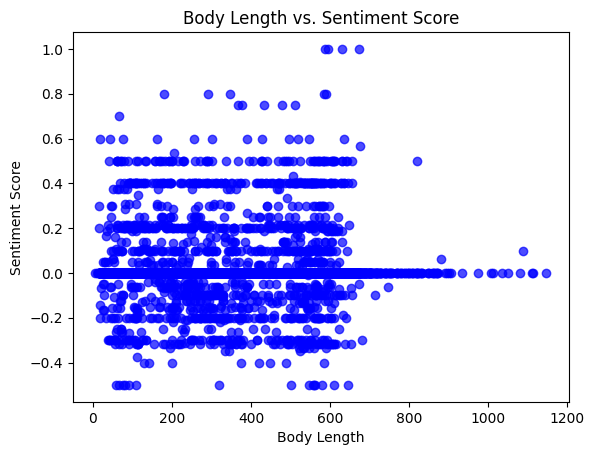

In [63]:
# Plot Body Length vs. Sentiment Score
plt.scatter(filtered_df['Body_length'], filtered_df['sentiment'], color='blue', alpha=0.7)
plt.xlabel("Body Length")
plt.ylabel("Sentiment Score")
plt.title("Body Length vs. Sentiment Score")
plt.show()


In [ ]:
# Extract keywords from the subject using YAKE
kw_extractor = yake.KeywordExtractor()

filtered_df['keywords'] = filtered_df['subject'].apply(lambda x: [kw[0] for kw in kw_extractor.extract_keywords(x)])

print(filtered_df[['subject', 'keywords']])


                                                 subject  \
1                                     Account Disruption   
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
5                                          Feature Query   
...                                                  ...   
28578                    Problem with Billing Adjustment   
28580  Urgent: Incident Involving Data Breach in Medi...   
28582       Performance Problem with Data Analytics Tool   
28585  Update Request for SaaS Platform Integration F...   
28586          Inquiry About Project Management Features   

                                                keywords  
1              [Account Disruption, Disruption, Account]  
2      [System Integration Features, Smart Home Syste...  
3      [Invoice Details, Inquiry Regarding Invoice, D...  
4      [Agency Software Compatibility, Mark

In [ ]:


# Download and load spaCy model
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Extract named entities
filtered_df['entities'] = filtered_df['body'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

print(filtered_df[['body', 'entities']])


In [ ]:
# Plot Open Rate vs. Subject Length
plt.scatter(filtered_df['subject_length'], filtered_df['open_rate'], color='green', alpha=0.7)
plt.xlabel("Subject Length")
plt.ylabel("Open Rate (%)")
plt.title("Subject Length vs. Email Open Rate")
plt.show()

# Word Frequency vs. Sentiment (Printing insights)
word_counts = Counter(" ".join(filtered_df['subject']).split())
print("\nWord Frequency:", word_counts)
print("\nCorrelation Between Subject Length & Open Rate:", filtered_df[['subject_length', 'open_rate']].corr())

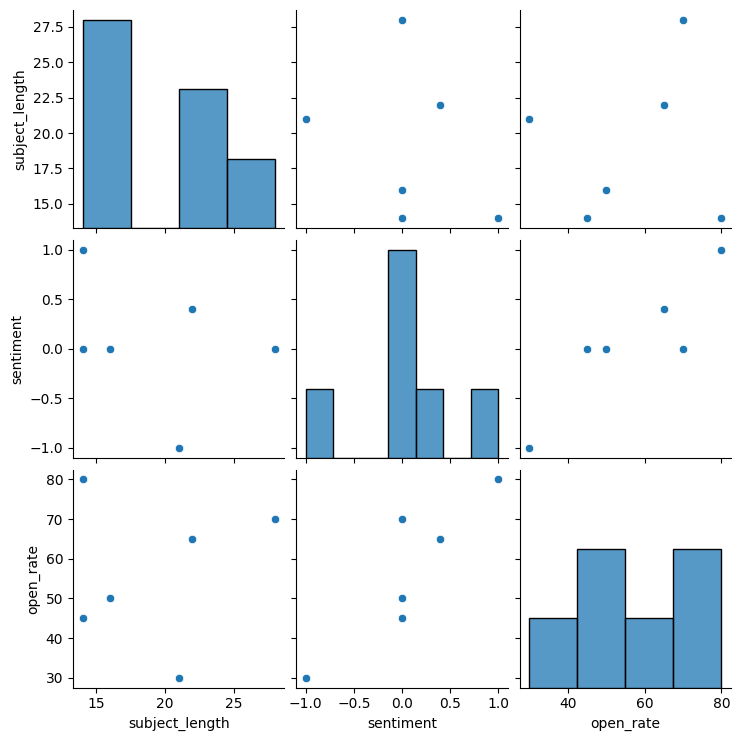

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob

# Sample DataFrame
data = {'subject': ["Great service!", "Worst experience ever", "Meeting Reminder", 
                     "Looking forward to the event", "Project Update", "Important Announcement"],
        'open_rate': [80, 30, 50, 70, 45, 65]}  # Simulated open rate %
filtered_df = pd.DataFrame(data)

# Compute Subject Length
filtered_df['subject_length'] = filtered_df['subject'].apply(len)

# Compute Sentiment Score
filtered_df['sentiment'] = filtered_df['subject'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Word Frequency Analysis
word_counts = Counter(" ".join(filtered_df['subject']).split())

# Pairwise relationships (Multivariate Analysis)
sns.pairplot(filtered_df, vars=['subject_length', 'sentiment', 'open_rate'])

In [79]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------ --------------------------------- 3.9/24.0 MB 19.6 MB/s eta 0:00:02
   ------------- -------------------------- 7.9/24.0 MB 18.7 MB/s eta 0:00:01
   ------------------- -------------------- 11.5/24.0 MB 19.0 MB/s eta 0:00:01
   ------------------------- -------------- 15.5/24.0 MB 18.7 MB/s eta 0:00:01
   ------------------------------- -------- 18.6/24.0 MB 18.6 MB/s eta 0:00:01
   ------------------------------------- -- 22.8/24.0 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   --- ------------------------------------ 3.9/45.9 MB 19.5 MB/s eta 0:00:03
   ------ --------------------------------- 7.9/45.9 MB 19.4 MB/s eta 0:00:02
   ---------- ----------------------------- 11.8/45.9 MB 18.9 MB/s eta 0:00:02
   ------------- -------------------------- 15.7/45.9 MB 19.0 MB/s eta 0:0

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

# Sample DataFrame
data = {'subject': ["Meeting Reminder for Project", "Exciting Offer Just for You", "Important Update on Your Account",
                     "Join Us for a Webinar", "Your Invoice Details", "Special Discount Inside"]}
filtered_df = pd.DataFrame(data)

# Preprocess Text
nltk.download('punkt')
nltk.download('punkt_tab')  # Explicitly download punkt_tab
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize & Convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords & special chars
    return tokens

filtered_df['processed_subject'] = filtered_df['subject'].apply(preprocess)

# Create Dictionary & Corpus
dictionary = corpora.Dictionary(filtered_df['processed_subject'])
corpus = [dictionary.doc2bow(text) for text in filtered_df['processed_subject']]

# Train LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Display Topics
print("\nIdentified Topics:")
for idx, topic in lda_model.show_topics(formatted=True):
    print(f"Topic {idx+1}: {topic}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tharani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tharani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tharani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Identified Topics:
Topic 1: 0.063*"offer" + 0.063*"invoice" + 0.063*"exciting" + 0.063*"details" + 0.062*"join" + 0.062*"inside" + 0.062*"us" + 0.062*"discount" + 0.062*"webinar" + 0.062*"special"
Topic 2: 0.087*"special" + 0.087*"webinar" + 0.087*"discount" + 0.087*"us" + 0.087*"inside" + 0.087*"join" + 0.087*"details" + 0.087*"exciting" + 0.087*"offer" + 0.087*"invoice"
Topic 3: 0.117*"important" + 0.117*"update" + 0.117*"account" + 0.117*"meeting" + 0.117*"reminder" + 0.117*"project" + 0.030*"invoice" + 0.030*"offer" + 0.030*"exciting" + 0.030*"details"
